In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [19]:
data = pd.read_excel('data/raw_data.xlsx', sheet_name="Wide")

## Restructuring the data

The data contains null values for columns, and the real column names are contained within a row in the dataframe. The row of column names need to be extracted, and added as the column names for the remaining data.

In [21]:
columns = data.iloc[2]
data = data.iloc[3:]
data.columns = columns
feature_columns = np.array(data.columns[3:])

## Standardising the original dataset

In [24]:
for column in feature_columns:
    data[column]=(data[column]-data[column].min())/(data[column].max()-data[column].min())

C:\Users\laram\AppData\Local\Temp/ipykernel_23160/740403168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column]=(data[column]-data[column].min())/(data[column].max()-data[column].min())


In [25]:
data = data.fillna(0)

## PCA on Entire Dataset

In [42]:
# Separating out the features
x = data.loc[:, feature_columns].values
# Separating out the target
y = data.loc[:,['Strain']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [44]:
finalDf = pd.concat([principalDf, data[['Strain']]], axis = 1)

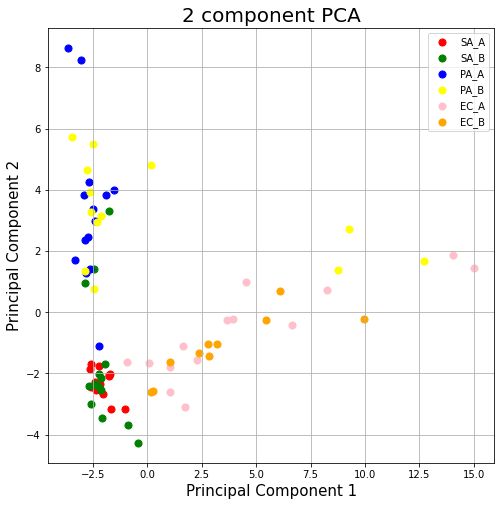

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['SA_A', 'SA_B', 'PA_A', 'PA_B', 'EC_A', 'EC_B']
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Strain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Plotting PCA Clusters per Media

### Re-formatting the sample column to only contain either 'TSB', 'BHI' or 'LB'

In [27]:
for sample in range(0, 83):
    sample_type = data.iloc[sample, 2]
    data.iloc[sample, 2] = sample_type[5:-2]

In [28]:
for sample in range(0, 84):
    sample_type = data.iloc[sample, 2]
    if 'TSB' in sample_type:
        data.iloc[sample, 2] = 'TSB'
    elif 'BHI' in sample_type:
        data.iloc[sample, 2] = 'BHI'
    elif 'LB' in sample_type:
        data.iloc[sample, 2] = 'LB'

In [30]:
data.iloc[:,2].unique()

array(['TSB', 'BHI', 'LB'], dtype=object)

In [31]:
TSB_dataframe = data.loc[data['Samples '] == 'TSB']
BHI_dataframe = data.loc[data['Samples '] == 'BHI']
LB_dataframe = data.loc[data['Samples '] == 'LB']

The indeces of the dataframe are off, so these need to be reset

In [80]:
TSB_dataframe = TSB_dataframe.reset_index(drop=True)
BHI_dataframe = BHI_dataframe.reset_index(drop=True)
LB_dataframe = LB_dataframe.reset_index(drop=True)

### Plotting PCA by TSB Media

In [82]:
# Separating out the features
x = TSB_dataframe.loc[:, feature_columns].values
# Separating out the target
y = TSB_dataframe.loc[:,['Strain']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [85]:
finalDf = pd.concat([principalDf, TSB_dataframe[['Strain']]], axis = 1)

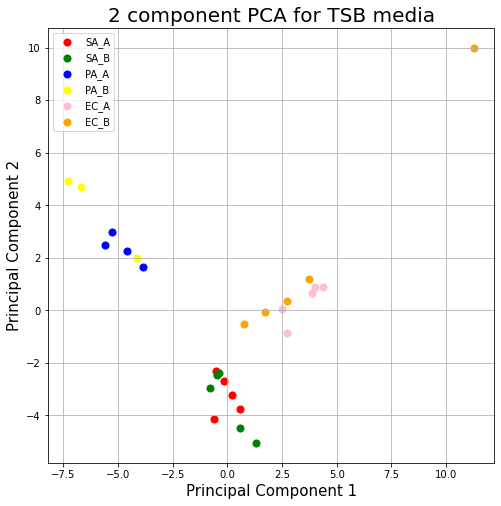

In [89]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for TSB media', fontsize = 20)
targets = ['SA_A', 'SA_B', 'PA_A', 'PA_B', 'EC_A', 'EC_B']
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Strain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Plotting PCA by BHI Media

In [92]:
# Separating out the features
x = BHI_dataframe.loc[:, feature_columns].values
# Separating out the target
y = BHI_dataframe.loc[:,['Strain']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [94]:
finalDf = pd.concat([principalDf, BHI_dataframe[['Strain']]], axis = 1)

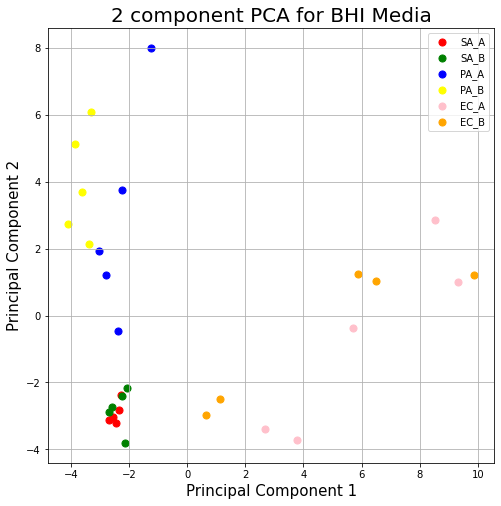

In [100]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for BHI Media', fontsize = 20)
targets = ['SA_A', 'SA_B', 'PA_A', 'PA_B', 'EC_A', 'EC_B']
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Strain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Plotting PCA by LB Media

In [96]:
# Separating out the features
x = LB_dataframe.loc[:, feature_columns].values
# Separating out the target
y = LB_dataframe.loc[:,['Strain']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [98]:
finalDf = pd.concat([principalDf, LB_dataframe[['Strain']]], axis = 1)

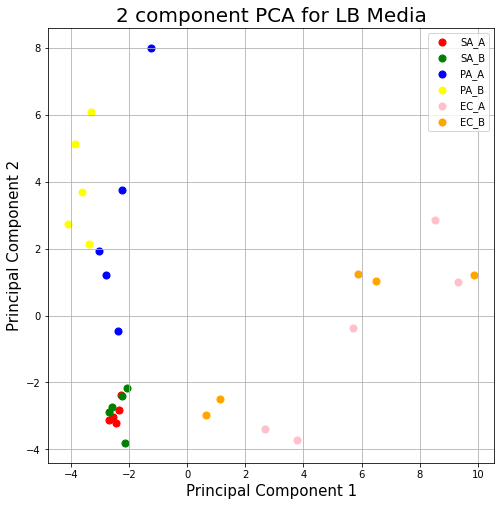

In [101]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA for LB Media', fontsize = 20)
targets = ['SA_A', 'SA_B', 'PA_A', 'PA_B', 'EC_A', 'EC_B']
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Strain'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()